<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/DCR_Ostium_area_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn

In [3]:
df = pd.read_excel('/content/drive/MyDrive/DCR Ostium area.xlsx')
df.shape

(25, 8)

In [4]:
df.columns

Index([' Intraop Ext DCR-OA', 'First postop day Ext DCR-OA ',
       '1 month postop Ext DCR-OA ', '3 months postop Ext DCR-OA',
       ' Intraop Endo DCR-OA', 'First postop day Endo DCR-OA ',
       '1 month postop Endo DCR-OA ', '3 months postop Endo DCR-OA'],
      dtype='object')

In [5]:
df.head()

,Intraop Ext DCR-OA,First postop day Ext DCR-OA,1 month postop Ext DCR-OA,3 months postop Ext DCR-OA,Intraop Endo DCR-OA,First postop day Endo DCR-OA,1 month postop Endo DCR-OA,3 months postop Endo DCR-OA
0,126.0,117.4044,104.000,96.75,77.0,77.00,68.25,63.00
1,105.0,97.6885,91.000,85.05,104.0,104.00,90.44,89.68
2,153.0,153.0000,140.250,128.70,104.5,99.00,85.80,77.00
3,60.0,60.0000,49.500,47.52,99.0,96.05,88.00,72.45
4,54.0,49.5000,43.243,41.00,60.5,53.41,48.15,45.00


In [6]:
df.tail()

,Intraop Ext DCR-OA,First postop day Ext DCR-OA,1 month postop Ext DCR-OA,3 months postop Ext DCR-OA,Intraop Endo DCR-OA,First postop day Endo DCR-OA,1 month postop Endo DCR-OA,3 months postop Endo DCR-OA
20,84.0,87.6,77.5200,63.6424,61.75,63.36,52.20,46.06
21,48.0,49.6,42.0660,40.7000,75.00,72.00,64.60,46.06
22,154.0,154.0,137.2350,132.6000,77.00,86.40,73.44,46.06
23,128.0,124.8,122.9312,107.8000,54.00,53.40,42.50,46.06
24,102.0,105.6,94.6200,88.0000,76.00,76.95,67.50,61.60


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Intraop Ext DCR-OA            25 non-null     float64
 1   First postop day Ext DCR-OA    25 non-null     float64
 2   1 month postop Ext DCR-OA      25 non-null     float64
 3   3 months postop Ext DCR-OA     25 non-null     float64
 4    Intraop Endo DCR-OA           25 non-null     float64
 5   First postop day Endo DCR-OA   25 non-null     float64
 6   1 month postop Endo DCR-OA     25 non-null     float64
 7   3 months postop Endo DCR-OA    25 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [8]:
df.isnull()

,Intraop Ext DCR-OA,First postop day Ext DCR-OA,1 month postop Ext DCR-OA,3 months postop Ext DCR-OA,Intraop Endo DCR-OA,First postop day Endo DCR-OA,1 month postop Endo DCR-OA,3 months postop Endo DCR-OA
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

 Intraop Ext DCR-OA              0
First postop day Ext DCR-OA      0
1 month postop Ext DCR-OA        0
3 months postop Ext DCR-OA       0
 Intraop Endo DCR-OA             0
First postop day Endo DCR-OA     0
1 month postop Endo DCR-OA       0
3 months postop Endo DCR-OA      0
dtype: int64

In [10]:
df.describe()

,Intraop Ext DCR-OA,First postop day Ext DCR-OA,1 month postop Ext DCR-OA,3 months postop Ext DCR-OA,Intraop Endo DCR-OA,First postop day Endo DCR-OA,1 month postop Endo DCR-OA,3 months postop Endo DCR-OA
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,101.140000,100.886916,90.535328,78.916576,79.890000,78.610800,67.123440,58.957600
std,26.632342,26.836341,25.732402,24.473585,19.125692,18.893991,17.197924,16.252544
min,48.000000,49.500000,42.066000,40.700000,54.000000,53.400000,41.650000,36.900000
25%,90.000000,88.000000,77.520000,63.642400,63.000000,62.640000,52.200000,46.060000
50%,100.000000,100.800000,91.000000,75.600000,77.000000,77.000000,67.500000,50.000000
75%,121.000000,115.500000,100.280000,90.000000,99.000000,96.050000,81.600000,72.450000
max,154.000000,154.000000,140.250000,132.600000,115.000000,118.320000,105.840000,97.920000


In [11]:
df.corr()

,Intraop Ext DCR-OA,First postop day Ext DCR-OA,1 month postop Ext DCR-OA,3 months postop Ext DCR-OA,Intraop Endo DCR-OA,First postop day Endo DCR-OA,1 month postop Endo DCR-OA,3 months postop Endo DCR-OA
Intraop Ext DCR-OA,1.000000,0.989566,0.973508,0.864098,0.077436,0.142521,0.084890,0.069330
First postop day Ext DCR-OA,0.989566,1.000000,0.977994,0.830599,0.104702,0.170556,0.109964,0.074642
1 month postop Ext DCR-OA,0.973508,0.977994,1.000000,0.864369,0.080749,0.155497,0.091319,0.078566
3 months postop Ext DCR-OA,0.864098,0.830599,0.864369,1.000000,0.092567,0.155709,0.111651,0.147748
Intraop Endo DCR-OA,0.077436,0.104702,0.080749,0.092567,1.000000,0.965161,0.949375,0.867786
First postop day Endo DCR-OA,0.142521,0.170556,0.155497,0.155709,0.965161,1.000000,0.983929,0.862103
1 month postop Endo DCR-OA,0.084890,0.109964,0.091319,0.111651,0.949375,0.983929,1.000000,0.878960
3 months postop Endo DCR-OA,0.069330,0.074642,0.078566,0.147748,0.867786,0.862103,0.878960,1.000000


<Axes: >

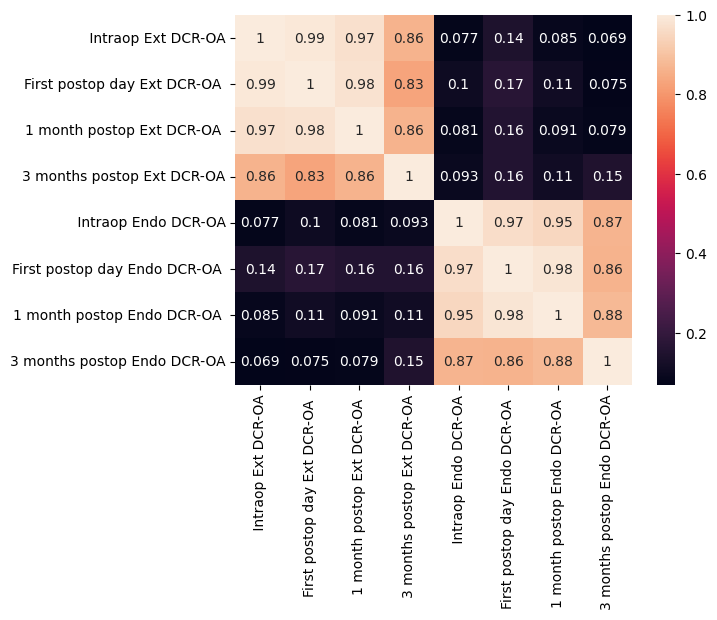

In [14]:
seaborn.heatmap(df.corr(), annot=True)

<Axes: >

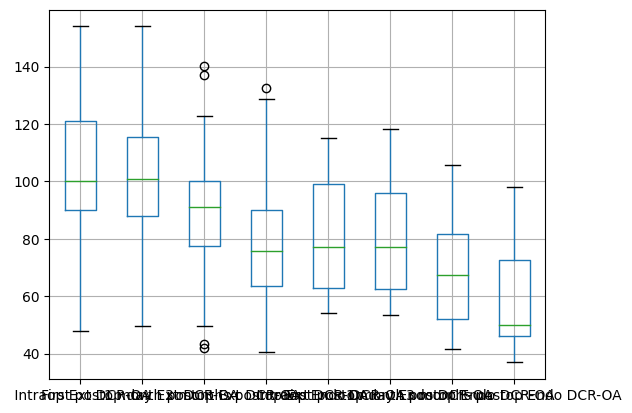

In [15]:
df.boxplot()

In [16]:
df.skew()

 Intraop Ext DCR-OA              0.041778
First postop day Ext DCR-OA      0.041460
1 month postop Ext DCR-OA       -0.014461
3 months postop Ext DCR-OA       0.645845
 Intraop Endo DCR-OA             0.259932
First postop day Endo DCR-OA     0.318341
1 month postop Endo DCR-OA       0.335825
3 months postop Endo DCR-OA      0.848057
dtype: float64

In [17]:
df.kurt()

 Intraop Ext DCR-OA              0.137860
First postop day Ext DCR-OA      0.209084
1 month postop Ext DCR-OA       -0.032730
3 months postop Ext DCR-OA       0.075016
 Intraop Endo DCR-OA            -1.435991
First postop day Endo DCR-OA    -1.049072
1 month postop Endo DCR-OA      -0.673883
3 months postop Endo DCR-OA     -0.225062
dtype: float64

array([[<Axes: title={'center': ' Intraop Ext DCR-OA'}>,
        <Axes: title={'center': 'First postop day Ext DCR-OA '}>,
        <Axes: title={'center': '1 month postop Ext DCR-OA '}>],
       [<Axes: title={'center': '3 months postop Ext DCR-OA'}>,
        <Axes: title={'center': ' Intraop Endo DCR-OA'}>,
        <Axes: title={'center': 'First postop day Endo DCR-OA '}>],
       [<Axes: title={'center': '1 month postop Endo DCR-OA '}>,
        <Axes: title={'center': '3 months postop Endo DCR-OA'}>,
        <Axes: >]], dtype=object)

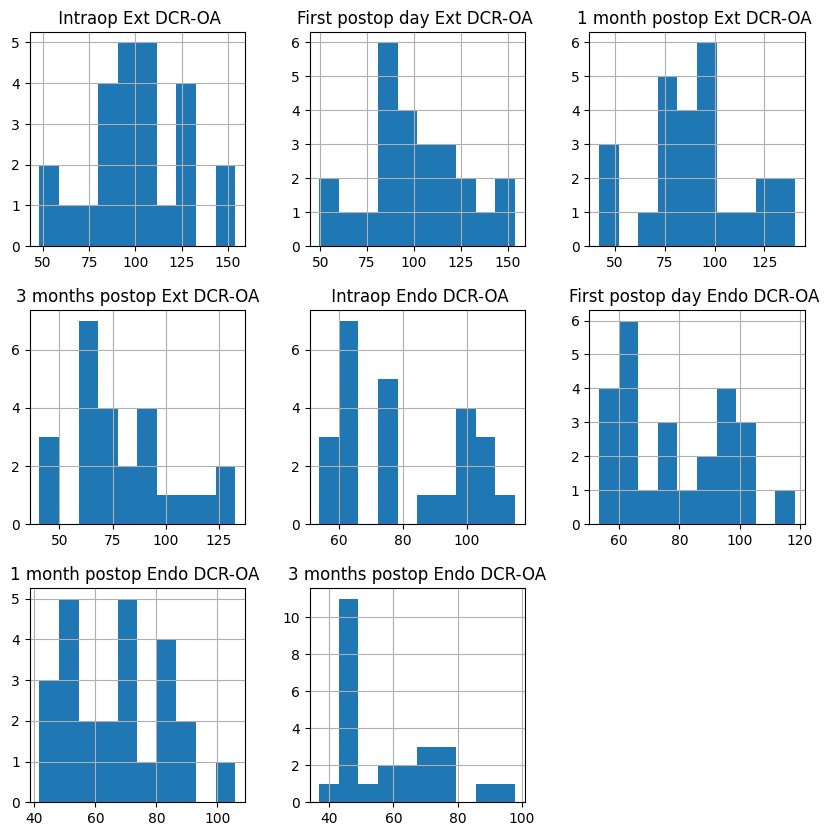

In [19]:
df.hist(figsize=(10,10))

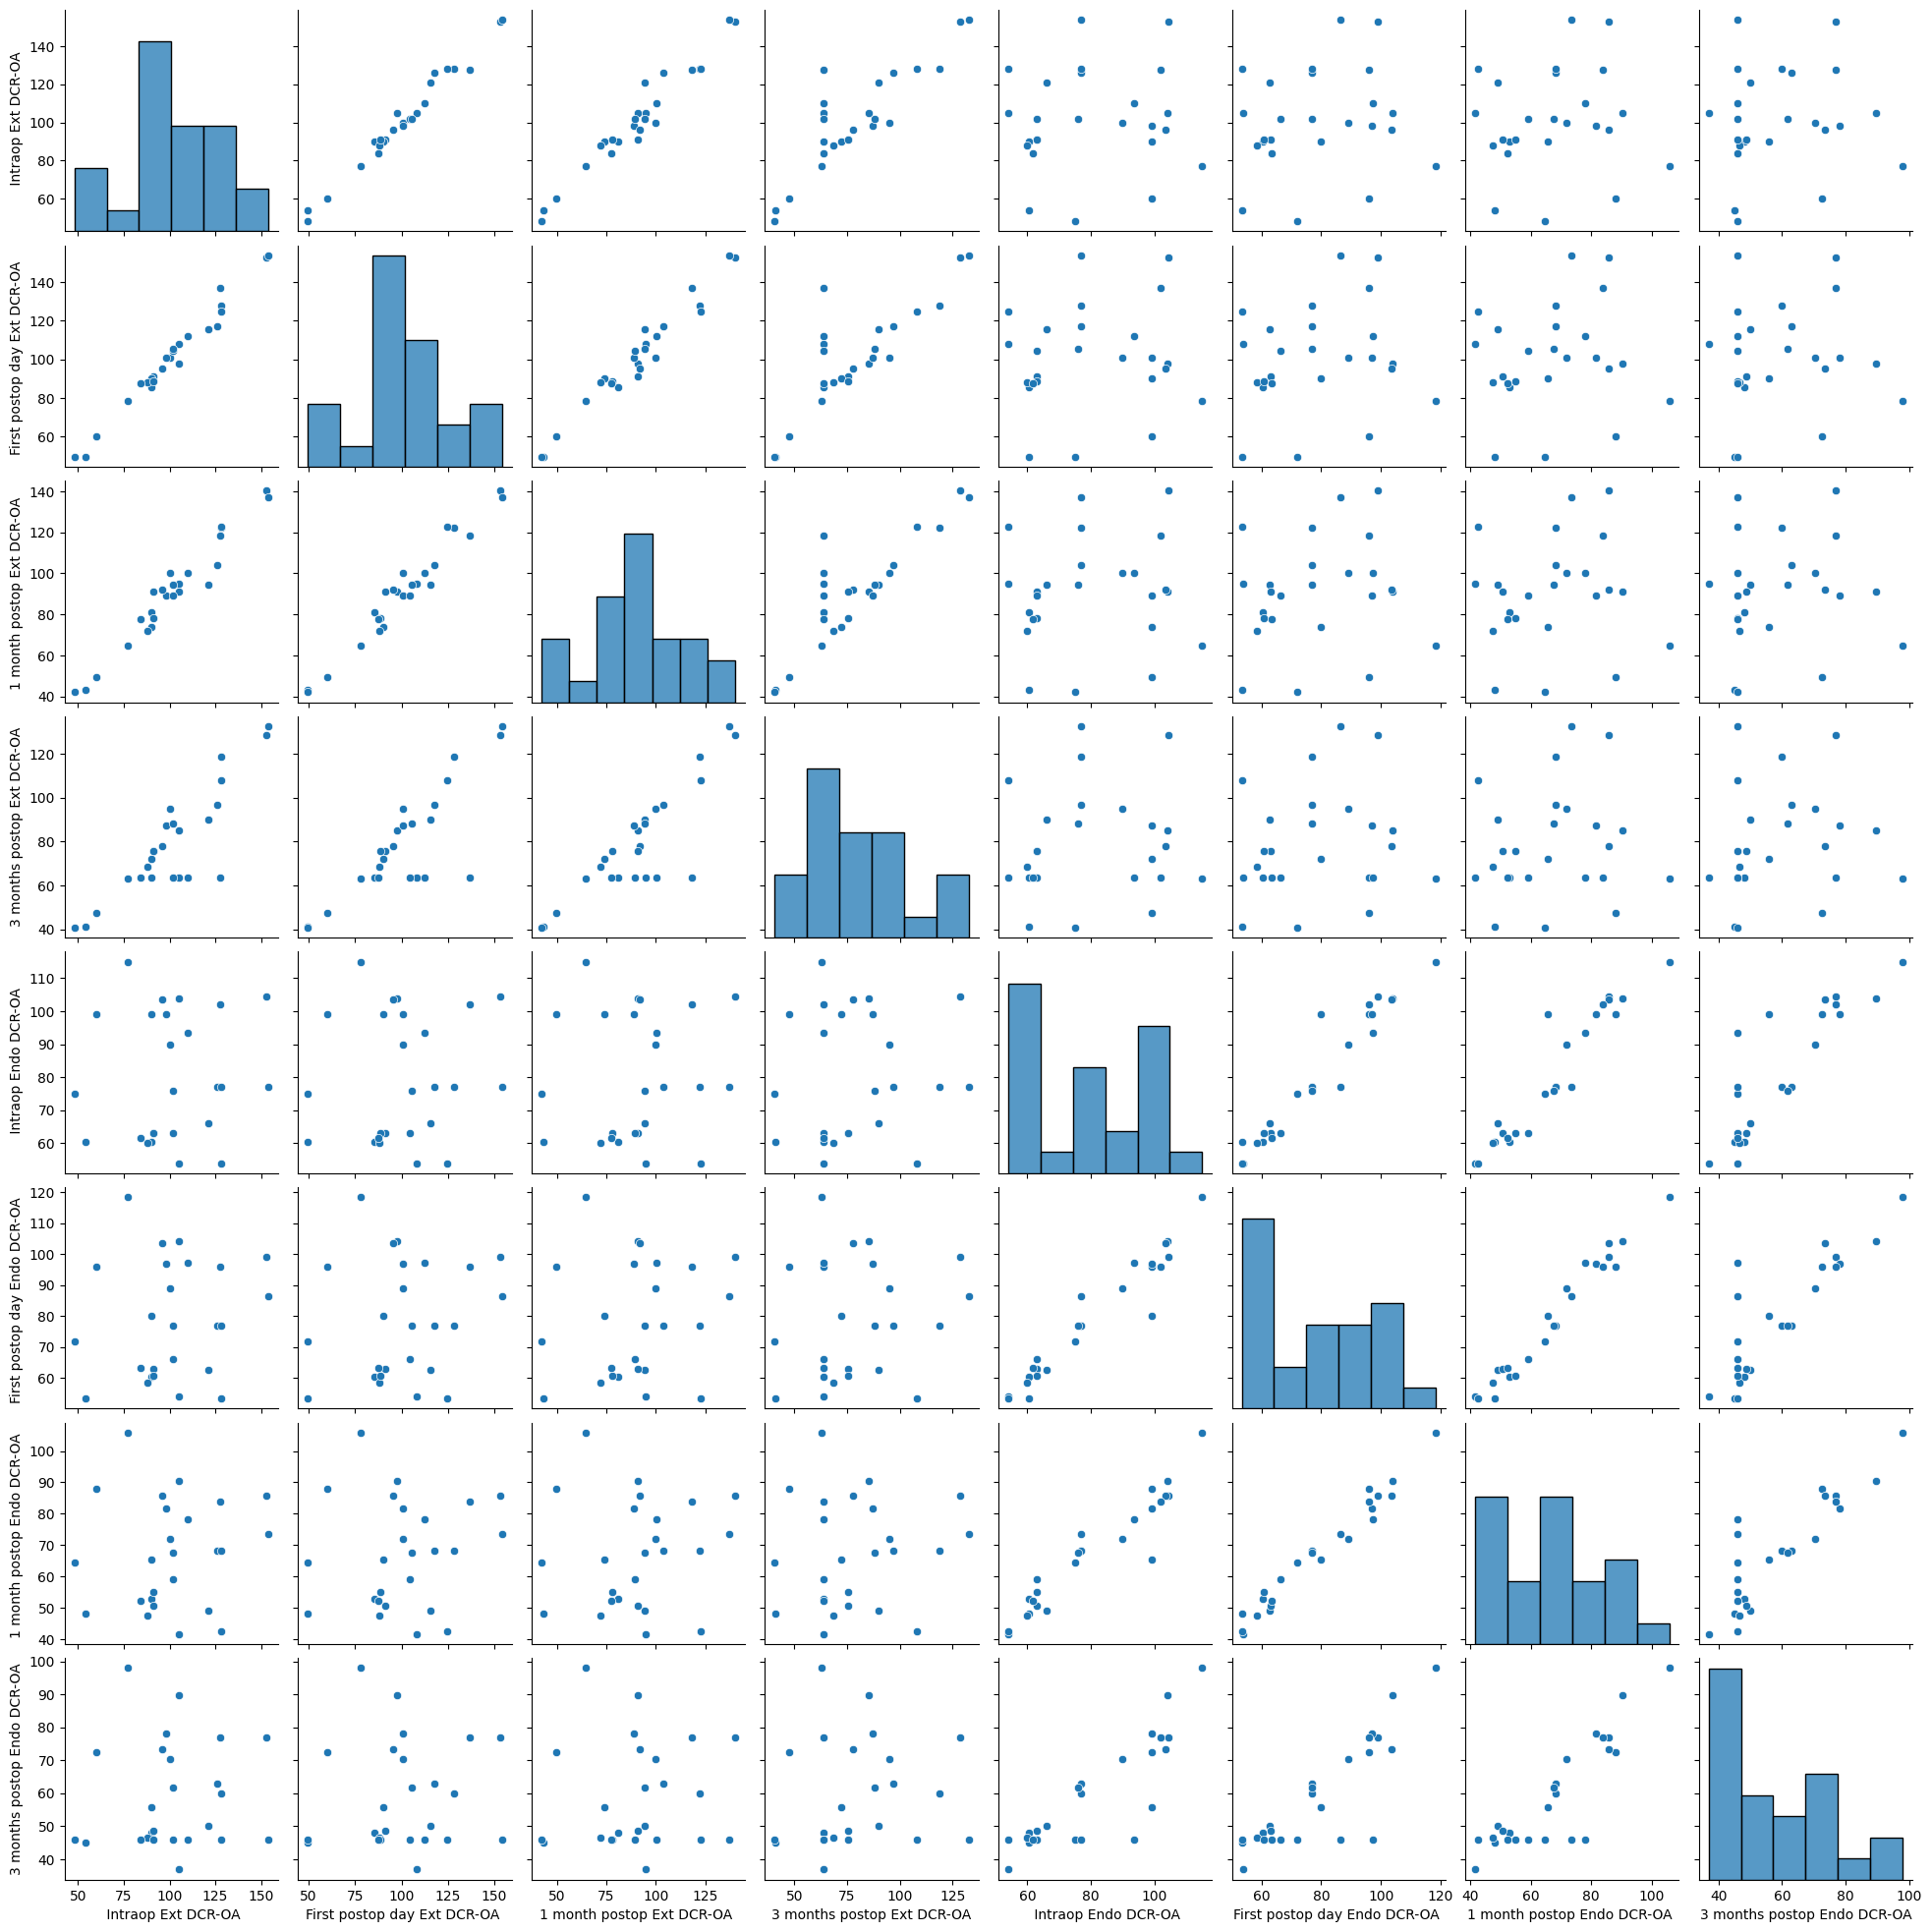

In [21]:
seaborn.pairplot(df)

<Axes: >

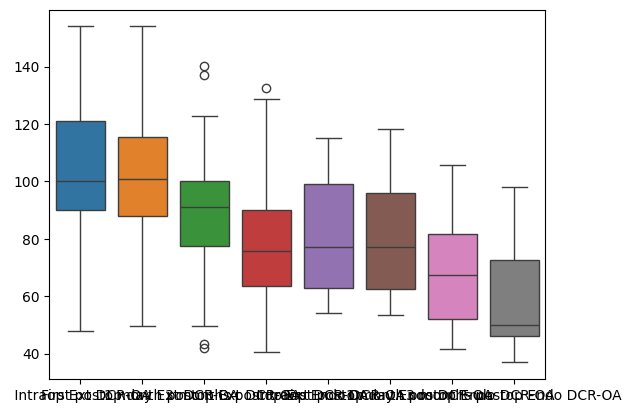

In [22]:
seaborn.boxplot(df)

<Axes: >

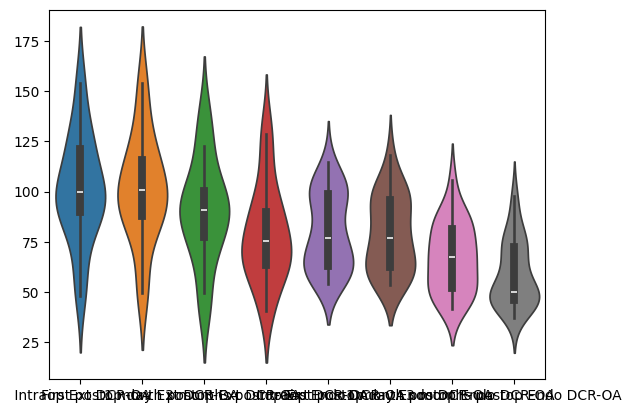

In [23]:
seaborn.violinplot(df)

<ipython-input-24-59595f08b577>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(df)


<Axes: ylabel='Density'>

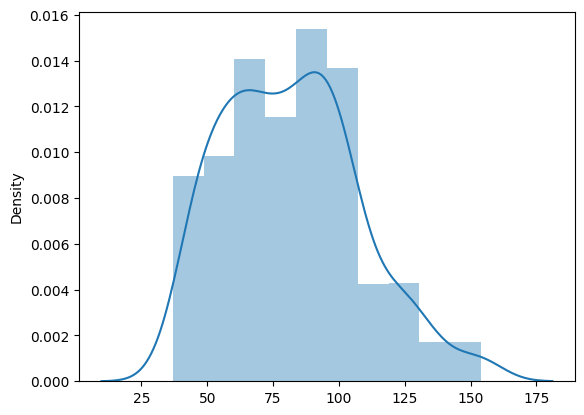

In [24]:
seaborn.distplot(df)

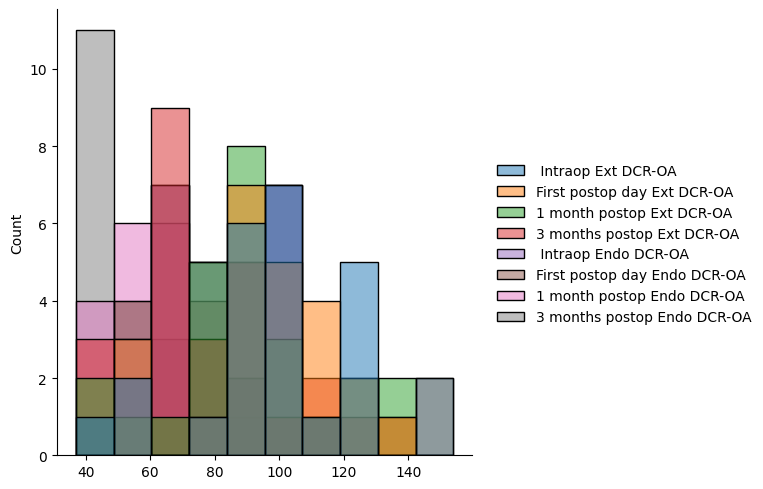

In [25]:
seaborn.displot(df)

<Axes: >

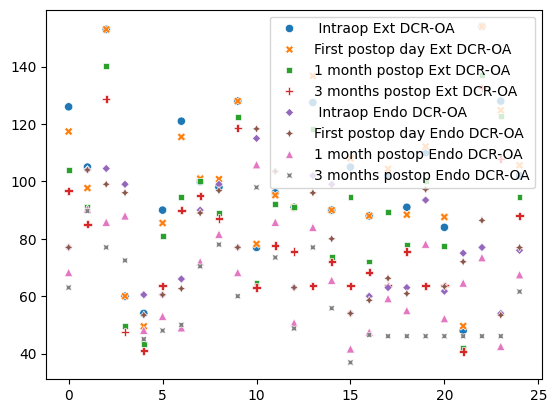

In [26]:
seaborn.scatterplot(df)

In [27]:
df.columns

Index([' Intraop Ext DCR-OA', 'First postop day Ext DCR-OA ',
       '1 month postop Ext DCR-OA ', '3 months postop Ext DCR-OA',
       ' Intraop Endo DCR-OA', 'First postop day Endo DCR-OA ',
       '1 month postop Endo DCR-OA ', '3 months postop Endo DCR-OA'],
      dtype='object')